PH Workbook:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import xlrd

Import the nummerical data from the Excel workbook

In [ ]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
xls.sheet_names

In [ ]:
df1 = pd.read_excel(xls, 'Outcomes & Factors Rankings', header=1)
df2 = pd.read_excel(xls, 'Outcomes & Factors SubRankings', header=1)
df3 = pd.read_excel(xls, 'Ranked Measure Data', header=1)
df4 = pd.read_excel(xls, 'Additional Measure Data', header=1)

Import the reference data from the Excel workbook

In [ ]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
rf1 = pd.read_excel(xls, 'Ranked Measure Sources & Years', header = 1)
rf2 = pd.read_excel(xls, 'Addtl Measure Sources & Years', header = 1)

In [ ]:
df1.head(1)

In [6]:
df2.head(1)

,FIPS,State,County,# of Ranked Counties,Rank,Quartile,Rank.1,Quartile.1,Rank.2,Quartile.2,Rank.3,Quartile.3,Rank.4,Quartile.4,Rank.5,Quartile.5
0,1001,Alabama,Autauga,67,8,1,5,1,15,1,14,1,5,1,50,3


In [7]:
df3.head(1)

,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Quartile,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),...,95% CI - High.17,Quartile.33,% Drive Alone (Black),% Drive Alone (Hispanic),% Drive Alone (White),# Workers who Drive Alone,% Long Commute - Drives Alone,95% CI - Low.18,95% CI - High.18,Quartile.34
0,1001,Alabama,Autauga,8824.057123,7935.325829,9712.788417,1,10471.252986,NaN,8706.658832,...,88.900847,3,82.722037,NaN,83.710021,20911,38.3,34.362673,42.237327,3


In [8]:
df4.head(1)

,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low.16,95% CI - High.16,% Female,# Rural,% Rural
0,1001.0,Alabama,Autauga,76.330589,75.554117,77.107061,74.600628,NaN,76.337219,815.0,...,2.857452,41336,74.473912,430.0,0.828548,0.422472,1.234624,51.342246,22921.0,42.002162


In [9]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
sheets = xls.sheet_names
sheets

['Introduction',
 'Outcomes & Factors Rankings',
 'Outcomes & Factors SubRankings',
 'Ranked Measure Data',
 'Ranked Measure Sources & Years',
 'Additional Measure Data',
 'Addtl Measure Sources & Years']

In [10]:
def missingvalues(sheet_name):
    """
    Outputs missing values percentage and a heatmap for a an Excel spreadsheet sheet
    input: sheet_name (use the .sheet_name option on a ExcelFile object to get the list)
    """
    df = xls.parse(sheet_name,header=[0,1])
    cols = df.columns
    ax = sns.heatmap(df[cols].isnull(), cmap=sns.color_palette('Set2',2))
    ax.set_title(f'Missing values for {sheet_name}')
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100)}% missing')

('Unnamed: 0_level_0', 'FIPS') - 0.0% missing
('Unnamed: 1_level_0', 'State') - 0.0% missing
('Unnamed: 2_level_0', 'County') - 0.0% missing
('Premature death', 'Years of Potential Life Lost Rate') - 7.0% missing
('Premature death', '95% CI - Low') - 7.0% missing
('Premature death', '95% CI - High') - 7.0% missing
('Premature death', 'Quartile') - 0.0% missing
('Premature death', 'YPLL Rate (Black)') - 57.0% missing
('Premature death', 'YPLL Rate (Hispanic)') - 73.0% missing
('Premature death', 'YPLL Rate (White)') - 50.0% missing
('Poor or fair health', '% Fair/Poor') - 0.0% missing
('Poor or fair health', '95% CI - Low') - 0.0% missing
('Poor or fair health', '95% CI - High') - 0.0% missing
('Poor or fair health', 'Quartile') - 0.0% missing
('Poor physical health days', 'Physically Unhealthy Days') - 0.0% missing
('Poor physical health days', '95% CI - Low') - 0.0% missing
('Poor physical health days', '95% CI - High') - 0.0% missing
('Poor physical health days', 'Quartile') - 0.0% m

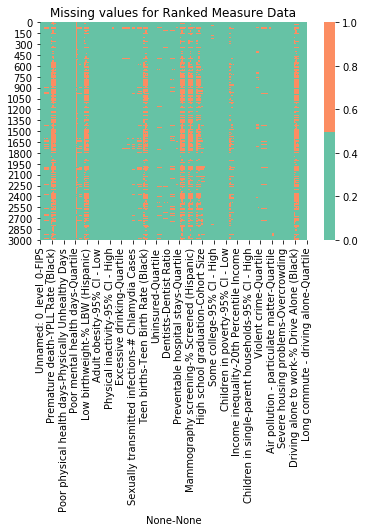

In [11]:
missingvalues(sheets[3])

In [12]:
pd.set_option('display.max_columns', None)  

#### Join the 4 dataframes from the 4 sheets 

In [13]:
print(f'df1 shape is: ' + str(df1.shape))
#print(f'df2 shape is: ' + str(df2.shape))
print(f'df3 shape is: ' + str(df3.shape))
print(f'df4 shape is: ' + str(df4.shape))
expected_cols = int(df1.shape[1]+df3.shape[1]+df4.shape[1]-3)

print(f'Expected merged df columns is :', + expected_cols)

df1 shape is: (3142, 8)
df3 shape is: (3142, 162)
df4 shape is: (3144, 111)
Expected merged df columns is : 278


In [14]:
droplist = ['County', 'State']
df2.drop(droplist,axis=1,inplace=True)
df3.drop(droplist,axis=1,inplace=True)
df4.drop(droplist,axis=1,inplace=True)

df = df1.merge(df3, on='FIPS')
df = df.merge(df4, on='FIPS')
df.shape

(3142, 275)

In [15]:
cols = df.columns

In [16]:
droplist = [i for i in df.columns if i.startswith('Quartile')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('95%')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('CI')]
df.drop(droplist,axis=1,inplace=True)

droplist = [i for i in df.columns if i.startswith('Rank')]
df.drop(droplist,axis=1,inplace=True)


In [17]:
cols = df.columns.values

In [18]:
len(cols)

164

In [19]:
droplist = [i for i in df.columns if i.startswith('# ')]
droplist = [i for i in df.columns if i.startswith('# ')]
df.drop(droplist,axis=1,inplace=True)

In [20]:
droplist = [i for i in df.columns if i.startswith('95%')]
df.drop(droplist,axis=1,inplace=True)
cols = df.columns.values
print(len(cols))

128


In [21]:
droplist = [i for i in df.columns if i.endswith('.1')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('.2')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('.3')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('_y')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(Black)')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(White)')]
df.drop(droplist,axis=1,inplace=True)
droplist = [i for i in df.columns if i.endswith('(Hispanic)')]
df.drop(droplist,axis=1,inplace=True)

cols = df.columns.values
print(len(cols))

86


In [22]:
cols

array(['FIPS', 'State', 'County', 'Years of Potential Life Lost Rate',
       '% Fair/Poor', 'Physically Unhealthy Days',
       'Mentally Unhealthy Days', 'Unreliable', '% LBW', '% Smokers',
       '% Obese', 'Food Environment Index', '% Physically Inactive',
       '% With Access', '% Excessive Drinking', '% Alcohol-Impaired',
       'Chlamydia Rate', 'Teen Birth Rate', '% Uninsured_x', 'PCP Rate',
       'PCP Ratio', 'Dentist Rate', 'Dentist Ratio', 'MHP Rate',
       'MHP Ratio', 'Preventable Hosp. Rate', '% Screened',
       '% Vaccinated', 'Cohort Size', 'Graduation Rate', 'Population_x',
       '% Some College', 'Labor Force', '% Unemployed',
       '% Children in Poverty', '80th Percentile Income',
       '20th Percentile Income', 'Income Ratio',
       '% Single-Parent Households', 'Association Rate',
       'Annual Average Violent Crimes', 'Violent Crime Rate',
       'Injury Death Rate', 'Average Daily PM2.5',
       'Presence of violation', '% Severe Housing Problems',
    

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 86 columns):
FIPS                                        3142 non-null int64
State                                       3142 non-null object
County                                      3142 non-null object
Years of Potential Life Lost Rate           2908 non-null float64
% Fair/Poor                                 3142 non-null float64
Physically Unhealthy Days                   3142 non-null float64
Mentally Unhealthy Days                     3142 non-null float64
Unreliable                                  170 non-null object
% LBW                                       3035 non-null float64
% Smokers                                   3142 non-null float64
% Obese                                     3142 non-null float64
Food Environment Index                      3123 non-null float64
% Physically Inactive                       3142 non-null float64
% With Access                            

In [24]:
unreliable = df[df['Unreliable']=='x']
unreliable.head()

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,Unreliable,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,% Alcohol-Impaired,Chlamydia Rate,Teen Birth Rate,% Uninsured_x,PCP Rate,PCP Ratio,Dentist Rate,Dentist Ratio,MHP Rate,MHP Ratio,Preventable Hosp. Rate,% Screened,% Vaccinated,Cohort Size,Graduation Rate,Population_x,% Some College,Labor Force,% Unemployed,% Children in Poverty,80th Percentile Income,20th Percentile Income,Income Ratio,% Single-Parent Households,Association Rate,Annual Average Violent Crimes,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,Severe Housing Cost Burden,Overcrowding,Inadequate Facilities,% Drive Alone,% Long Commute - Drives Alone,Life Expectancy,Age-Adjusted Mortality,Child Mortality Rate,Infant Mortality Rate,% Frequent Physical Distress,% Frequent Mental Distress,% Diabetic,HIV Prevalence Rate,% Food Insecure,% Limited Access,Drug Overdose Mortality Rate,MV Mortality Rate,% Insufficient Sleep,Other PCP Rate,Other PCP Ratio,% Disconnected Youth,Household Income,% Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,Firearm Fatalities Rate,% Homeowners,% Severe Housing Cost Burden,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural
68,2016,Alaska,Aleutians West,NaN,15.176383,2.966867,2.569844,x,7.589286,15.346801,40.0,7.7,23.9,89.552239,19.390485,100.0,315.7,15.220700,22.278978,35.41704,2824:1,104.11244,961:1,86.76037,1153:1,NaN,NaN,NaN,45.0,93.333333,1928,53.060166,3861.0,3.626004,7.6,144308,44879,3.215491,30.620985,7.083407,13.0,294.617564,NaN,NaN,No,18.421053,8.127208,9.649123,2.105263,45.378788,0.5,81.367308,245.0,NaN,NaN,8.954271,8.483086,8.2,NaN,12.4,8.574048,NaN,NaN,34.421050,190.87281,524:1,NaN,80290.0,18.644068,NaN,11.244810,NaN,NaN,30.131363,8.176101,11.712650,6.541732,6.472323,11.990283,40.829429,2.568107,13.569322,23.269131,7.764536,33.420094,100.000000
72,2068,Alaska,Denali,NaN,12.200584,3.232785,2.959423,x,6.707317,17.614422,27.0,6.2,15.2,67.962760,22.715164,40.0,208.4,NaN,14.529915,0.00000,1953:0,0.00000,2074:0,NaN,NaN,NaN,NaN,NaN,51.0,45.098039,598,73.913043,1130.0,9.380531,9.0,131688,40107,3.283417,10.862620,20.481311,NaN,NaN,NaN,NaN,No,26.470588,7.794118,8.676471,15.441176,35.045514,20.4,81.204038,NaN,NaN,NaN,9.604781,9.886663,6.8,NaN,13.7,22.933715,NaN,NaN,29.999092,144.64802,691:1,NaN,73220.0,1.374570,NaN,NaN,NaN,NaN,78.613569,6.172840,18.900675,10.028930,1.783992,5.207329,4.580521,0.048216,3.809065,80.568949,0.630063,44.165863,100.000000
82,2164,Alaska,Lake and Peninsula,NaN,23.973524,5.248306,4.574549,x,4.888889,32.081323,33.5,3.4,23.6,47.087676,20.055093,NaN,959.7,27.160494,27.997179,64.02049,1562:1,0.00000,1620:0,61.72840,1620:1,NaN,NaN,NaN,NaN,NaN,345,48.115942,723.0,11.894882,22.3,89000,21357,4.167252,51.648352,6.402049,NaN,NaN,199.401795,NaN,Yes,26.530612,5.714286,8.979592,15.306122,22.043011,0.0,NaN,641.8,NaN,NaN,16.732175,16.051985,7.9,NaN,18.6,43.516344,NaN,NaN,34.389531,185.18519,540:1,NaN,47644.0,68.767908,NaN,NaN,NaN,NaN,68.137255,5.785124,28.024691,10.493827,0.987654,62.037037,2.654321,0.308642,3.148148,22.222222,0.988468,48.086420,100.000000
88,2198,Alaska,Prince of Wales-Hyder,11628.029401,19.295736,4.449669,3.968685,x,3.558719,23.359239,35.4,6.4,24.1,NaN,20.170589,40.0,441.6,14.062500,24.269744,78.77738,1269:1,46.56216,2148:1,77.60360,1289:1,NaN,NaN,NaN,103.0,70.873786,1518,48.089592,2836.0,11.424542,24.0,104519,22574,4.630061,39.262187,14.179928,NaN,NaN,144.944569,NaN,No,18.281938,7.250221,5.726872,6.828194,50.711812,10.1,73.623962,464.6,NaN,NaN,13.495299,13.356936,10.1,NaN,16.5,14.764996,NaN,NaN,33.078349,155.20720,644:1,NaN,46488.0,65.890308,NaN,37.554227,NaN,NaN,73.002160,7.300275,23.156914,15.831135,0.496663,42.

In [25]:
df.rename(columns={'Unreliable':'Unreliable (Low Birth Weight)'}, inplace=True)

In [26]:
df.to_csv("cleaned_data.csv", index=False)

In [27]:
df.isna().sum()

FIPS                                   0
State                                  0
County                                 0
Years of Potential Life Lost Rate    234
% Fair/Poor                            0
                                    ... 
% Hispanic                             0
% Non-Hispanic White                   0
% Not Proficient in English            0
% Female                               0
% Rural                                7
Length: 86, dtype: int64

In [28]:
df.shape

(3142, 86)

### Data Exploration

Firearms fatalities vs percentage Excessive Drinking

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid') 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('cleaned_data.csv')
df.head()
df = df.dropna(axis=1,how='all')

In [31]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_'), ('<','under'), ('%','percent'), ('/', '_or_') 
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [32]:
del df['Years_of_Potential_Life_Lost_Rate']
df['percent_Rural'] = df['percent_Rural'].replace(np.nan, 0)

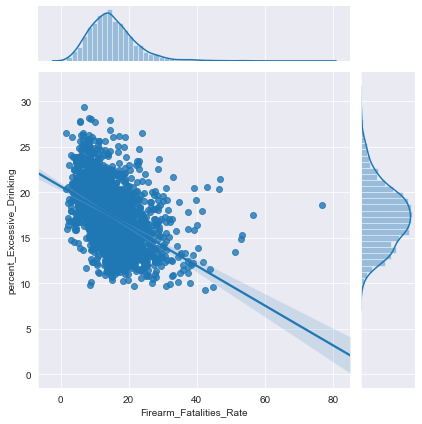

In [33]:
sns.jointplot('Firearm_Fatalities_Rate','percent_Excessive_Drinking', data=df, kind='reg');

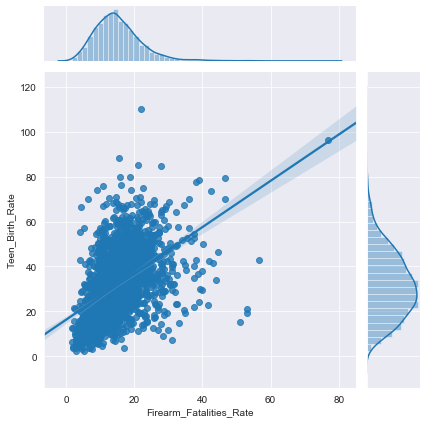

In [34]:
sns.jointplot('Firearm_Fatalities_Rate','Teen_Birth_Rate', data=df, kind='reg');

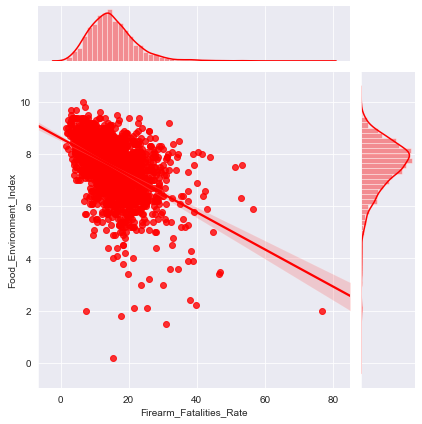

In [35]:
sns.jointplot('Firearm_Fatalities_Rate','Food_Environment_Index', data=df, kind='reg', color='red');

### Checking for Multicollinearity

In [3]:
feats = ['percent_Fair_or_Poor',
 'Physically_Unhealthy_Days',
 'Mentally_Unhealthy_Days',
 'percent_LBW',
 'percent_Smokers',
 'percent_Obese',
 'Food_Environment_Index',
 'percent_Physically_Inactive',
 'percent_With_Access',
 'percent_Excessive_Drinking',
 'percent_Alcohol_Impaired',
 'Chlamydia_Rate',
 'Teen_Birth_Rate',
 'percent_Uninsured_x']
corr = df[feats].corr()
corr

NameError: name 'df' is not defined

### Heatmap

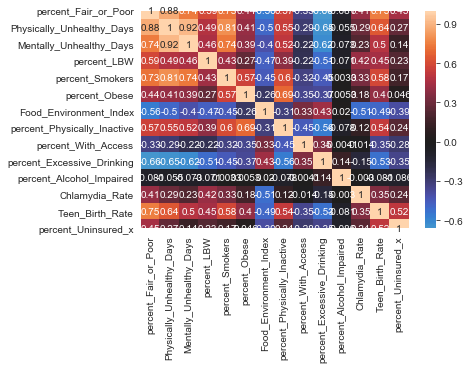

In [37]:
sns.heatmap(corr, center=0, annot=True);

### Modelling the Data

Import the necessary libraries for the modelling phase

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

##### Abitrary Selection of Explanatory Variables

Define the target variable and the independent and explanatory variables

In [39]:
outcome = 'Firearm_Fatalities_Rate'
x_cols = list(df.columns)
x_cols.remove(outcome)
x_cols.remove('FIPS')
x_cols.remove('State')
x_cols.remove('County')
x_cols.remove('20th_Percentile_Income')
x_cols.remove('80th_Percentile_Income')
x_cols.remove('Unreliable_(Low_Birth_Weight)')

x_cols = ['percent_Fair_or_Poor',
 'Physically_Unhealthy_Days',
 'Mentally_Unhealthy_Days',
 'percent_LBW',
 'percent_Smokers',
 'percent_Obese',
 'Food_Environment_Index',
 'percent_Physically_Inactive',
 'percent_With_Access',
 'percent_Excessive_Drinking',
 'percent_Alcohol_Impaired',
 'Chlamydia_Rate',
 'Teen_Birth_Rate',
 'percent_Uninsured_x']

In [40]:
df['percent_LBW'].fillna(0, inplace = True)
df['Food_Environment_Index'].fillna(df['Food_Environment_Index'].mean(), inplace = True)
df['percent_With_Access'].fillna(0, inplace = True)
df['percent_Alcohol_Impaired'].fillna(0, inplace = True)
df['percent_Uninsured_x'].fillna(0, inplace = True)
df['Chlamydia_Rate'].fillna(0, inplace = True)
df['Teen_Birth_Rate'].fillna(0, inplace = True)

### Test train split

In [41]:
#### Must standardize - Ask where we do it

In [42]:
train, test = train_test_split(df)
train.head(2) 

,FIPS,State,County,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,Unreliable_(Low_Birth_Weight),percent_LBW,percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,percent_Uninsured_x,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp_Rate,percent_Screened,percent_Vaccinated,Cohort_Size,Graduation_Rate,Population_x,percent_Some_College,Labor_Force,percent_Unemployed,percent_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,percent_Single_Parent_Households,Association_Rate,Annual_Average_Violent_Crimes,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM25,Presence_of_violation,percent_Severe_Housing_Problems,Severe_Housing_Cost_Burden,Overcrowding,Inadequate_Facilities,percent_Drive_Alone,percent_Long_Commute___Drives_Alone,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,percent_Frequent_Physical_Distress,percent_Frequent_Mental_Distress,percent_Diabetic,HIV_Prevalence_Rate,percent_Food_Insecure,percent_Limited_Access,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,percent_Insufficient_Sleep,Other_PCP_Rate,Other_PCP_Ratio,percent_Disconnected_Youth,Household_Income,percent_Free_or_Reduced_Lunch,Segregation_index,Segregation_Index,Homicide_Rate,Firearm_Fatalities_Rate,percent_Homeowners,percent_Severe_Housing_Cost_Burden,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
2105,39125,Ohio,Paulding,15.401054,3.712708,3.911125,NaN,7.301173,20.314607,31.8,8.3,27.5,18.558173,18.304730,38.095238,332.0,32.941176,6.664938,31.80493,3144:1,21.22579,4711:1,53.06447,1885:1,4797.0,39.0,47.0,231.0,96.969697,4360,46.422018,8862.0,4.445949,15.6,88549,23790,3.722110,21.974593,13.782136,14.0,97.174984,73.739321,12.2,No,12.337662,9.238845,2.012987,1.493506,84.732289,33.7,77.462448,369.5,NaN,NaN,11.026490,11.870464,12.3,75.9,10.9,5.539558,NaN,23.195953,36.092200,31.83868,3141:1,NaN,52534.0,52.523448,NaN,37.882026,NaN,11.6,76.887600,8.521644,23.778191,18.105598,0.981693,0.419209,0.313080,0.031839,4.648448,92.618732,0.426344,50.246750,81.900683
18,1037,Alabama,Coosa,23.987608,4.824660,4.707157,NaN,13.493253,20.504570,40.4,6.9,31.0,8.310945,13.531704,21.875000,440.9,45.273632,13.343875,NaN,NaN,NaN,NaN,9.29887,10754:1,4725.0,39.0,39.0,81.0,82.716049,2451,44.961240,4348.0,4.622815,27.6,68298,15942,4.284155,36.325459,9.450903,26.5,254.832195,115.149602,11.0,No,16.067416,13.532110,1.011236,1.910112,83.200000,39.4,73.416101,528.0,NaN,NaN,15.007976,14.415415,18.6,149.7,16.3,10.124807,NaN,41.047642,36.809372,9.29887,10754:1,NaN,42442.0,68.163265,56.494758,56.652478,NaN,24.1,80.328259,11.693961,16.403199,22.763623,30.174819,0.585829,0.148782,0.167380,2.427004,65.770876,0.539415,49.804724,100.000000


In [43]:
print(len(train), len(test))
train.head(2)

2356 786


,FIPS,State,County,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,Unreliable_(Low_Birth_Weight),percent_LBW,percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,percent_Uninsured_x,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp_Rate,percent_Screened,percent_Vaccinated,Cohort_Size,Graduation_Rate,Population_x,percent_Some_College,Labor_Force,percent_Unemployed,percent_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,percent_Single_Parent_Households,Association_Rate,Annual_Average_Violent_Crimes,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM25,Presence_of_violation,percent_Severe_Housing_Problems,Severe_Housing_Cost_Burden,Overcrowding,Inadequate_Facilities,percent_Drive_Alone,percent_Long_Commute___Drives_Alone,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,percent_Frequent_Physical_Distress,percent_Frequent_Mental_Distress,percent_Diabetic,HIV_Prevalence_Rate,percent_Food_Insecure,percent_Limited_Access,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,percent_Insufficient_Sleep,Other_PCP_Rate,Other_PCP_Ratio,percent_Disconnected_Youth,Household_Income,percent_Free_or_Reduced_Lunch,Segregation_index,Segregation_Index,Homicide_Rate,Firearm_Fatalities_Rate,percent_Homeowners,percent_Severe_Housing_Cost_Burden,percent_under_18,percent_65_and_over,percent_African_American,percent_American_Indian_or_Alaskan_Native,percent_Asian,percent_Native_Hawaiian_or_Other_Pacific_Islander,percent_Hispanic,percent_Non_Hispanic_White,percent_Not_Proficient_in_English,percent_Female,percent_Rural
2105,39125,Ohio,Paulding,15.401054,3.712708,3.911125,NaN,7.301173,20.314607,31.8,8.3,27.5,18.558173,18.304730,38.095238,332.0,32.941176,6.664938,31.80493,3144:1,21.22579,4711:1,53.06447,1885:1,4797.0,39.0,47.0,231.0,96.969697,4360,46.422018,8862.0,4.445949,15.6,88549,23790,3.722110,21.974593,13.782136,14.0,97.174984,73.739321,12.2,No,12.337662,9.238845,2.012987,1.493506,84.732289,33.7,77.462448,369.5,NaN,NaN,11.026490,11.870464,12.3,75.9,10.9,5.539558,NaN,23.195953,36.092200,31.83868,3141:1,NaN,52534.0,52.523448,NaN,37.882026,NaN,11.6,76.887600,8.521644,23.778191,18.105598,0.981693,0.419209,0.313080,0.031839,4.648448,92.618732,0.426344,50.246750,81.900683
18,1037,Alabama,Coosa,23.987608,4.824660,4.707157,NaN,13.493253,20.504570,40.4,6.9,31.0,8.310945,13.531704,21.875000,440.9,45.273632,13.343875,NaN,NaN,NaN,NaN,9.29887,10754:1,4725.0,39.0,39.0,81.0,82.716049,2451,44.961240,4348.0,4.622815,27.6,68298,15942,4.284155,36.325459,9.450903,26.5,254.832195,115.149602,11.0,No,16.067416,13.532110,1.011236,1.910112,83.200000,39.4,73.416101,528.0,NaN,NaN,15.007976,14.415415,18.6,149.7,16.3,10.124807,NaN,41.047642,36.809372,9.29887,10754:1,NaN,42442.0,68.163265,56.494758,56.652478,NaN,24.1,80.328259,11.693961,16.403199,22.763623,30.174819,0.585829,0.148782,0.167380,2.427004,65.770876,0.539415,49.804724,100.000000


In [44]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.372
Model:                                 OLS   Adj. R-squared:                  0.367
Method:                      Least Squares   F-statistic:                     69.41
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):          2.27e-154
Time:                             15:22:12   Log-Likelihood:                -5152.0
No. Observations:                     1655   AIC:                         1.033e+04
Df Residuals:                         1640   BIC:                         1.042e+04
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      31.6082      3.556      8.888      0.000      24.633      38.583
percent_Fair_or_Poor           -0.6405      0.092     -6.993      0.000      -0.820      -0.461
Physically_Unhealthy_Days       2.2257      0.783      2.841      0.005       0.689       3.762
Mentally_Unhealthy_Days         0.0565      0.647      0.087      0.930      -1.213       1.326
percent_LBW                     0.5478      0.107      5.118      0.000       0.338       0.758
percent_Smokers                 0.1253      0.073      1.718      0.086      -0.018       0.268
percent_Obese                  -0.0630      0.044     -1.418      0.156      -0.150       0.024
Food_Environment_Index         -1.7605      0.199     -8.828      0.000      -2.152      -1.369
percent_Physically_Inactive    -0.0651      0.045     -1.436      0.151      -0.154       0.024
percent_With_Access            -0.0410      0.009     -4.796      0.000      -0.058      -0.024
percent_Excessive_Drinking     -0.4265      0.066     -6.419      0.000      -0.557      -0.296
percent_Alcohol_Impaired        0.0463      0.012      3.730      0.000       0.022       0.071
Chlamydia_Rate                 -0.0018      0.001     -2.315      0.021      -0.003      -0.000
Teen_Birth_Rate                 0.1105      0.015      7.171      0.000       0.080       0.141
percent_Uninsured_x             0.1690      0.039      4.299      0.000       0.092       0.246
==============================================================================
Omnibus:                      696.598   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5382.241
Skew:                           1.782   Prob(JB):                         0.00
Kurtosis:                      11.084   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove the Uninfluential Features

In [45]:
# Your code here - Remove features which do not appear to be statistically relevant
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

15 10
['percent_Fair_or_Poor', 'Physically_Unhealthy_Days', 'percent_LBW', 'Food_Environment_Index', 'percent_With_Access']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,31.6082,3.556,8.888,0.000,24.633,38.583
percent_Fair_or_Poor,-0.6405,0.092,-6.993,0.000,-0.820,-0.461
Physically_Unhealthy_Days,2.2257,0.783,2.841,0.005,0.689,3.762
Mentally_Unhealthy_Days,0.0565,0.647,0.087,0.930,-1.213,1.326
percent_LBW,0.5478,0.107,5.118,0.000,0.338,0.758


In [46]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.369
Model:                                 OLS   Adj. R-squared:                  0.365
Method:                      Least Squares   F-statistic:                     96.17
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):          1.38e-156
Time:                             15:22:12   Log-Likelihood:                -5156.0
No. Observations:                     1655   AIC:                         1.033e+04
Df Residuals:                         1644   BIC:                         1.039e+04
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     28.4782      3.204      8.887      0.000      22.193      34.763
percent_Fair_or_Poor          -0.6737      0.088     -7.624      0.000      -0.847      -0.500
Physically_Unhealthy_Days      2.6508      0.485      5.469      0.000       1.700       3.601
percent_LBW                    0.5442      0.105      5.177      0.000       0.338       0.750
Food_Environment_Index        -1.8019      0.198     -9.080      0.000      -2.191      -1.413
percent_With_Access           -0.0359      0.008     -4.483      0.000      -0.052      -0.020
percent_Excessive_Drinking    -0.3803      0.062     -6.132      0.000      -0.502      -0.259
percent_Alcohol_Impaired       0.0479      0.012      3.875      0.000       0.024       0.072
Chlamydia_Rate                -0.0018      0.001     -2.319      0.021      -0.003      -0.000
Teen_Birth_Rate                0.1070      0.015      7.250      0.000       0.078       0.136
percent_Uninsured_x            0.1768      0.037      4.743      0.000       0.104       0.250
==============================================================================
Omnibus:                      733.248   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6161.410
Skew:                           1.868   Prob(JB):                         0.00
Kurtosis:                      11.683   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Investigate Multicollinearity

In [47]:
x_cols = ['percent_Fair_or_Poor', 'Physically_Unhealthy_Days',  'Mentally_Unhealthy_Days', 'percent_LBW', 'percent_Smokers', 'percent_Obese', 'Food_Environment_Index', 'percent_Physically_Inactive', 'percent_With_Access','percent_Excessive_Drinking', 'percent_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'percent_Uninsured_x']





In [48]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('percent_Fair_or_Poor', 123.0521533745777),
 ('Physically_Unhealthy_Days', 555.4731212036596),
 ('Mentally_Unhealthy_Days', 353.5291278630323),
 ('percent_LBW', 18.861210980146083),
 ('percent_Smokers', 98.52953419910902),
 ('percent_Obese', 100.42623369638254),
 ('Food_Environment_Index', 62.28505785751473),
 ('percent_Physically_Inactive', 71.4161308849402),
 ('percent_With_Access', 12.226176675035271),
 ('percent_Excessive_Drinking', 46.45289872358774),
 ('percent_Alcohol_Impaired', 4.668099542871897),
 ('Chlamydia_Rate', 4.911608536174613),
 ('Teen_Birth_Rate', 11.344266090789937),
 ('percent_Uninsured_x', 8.801370455247264)]

In [49]:
X.describe()

,percent_Fair_or_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,percent_LBW,percent_Smokers,percent_Obese,Food_Environment_Index,percent_Physically_Inactive,percent_With_Access,percent_Excessive_Drinking,percent_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,percent_Uninsured_x
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,17.483261,3.922021,3.932145,7.836974,17.872612,32.071547,7.465738,25.699968,62.787390,17.411379,28.936009,364.178517,30.629654,11.134986
std,4.699417,0.714456,0.613682,2.494684,3.660079,4.589006,1.162148,5.173400,23.235909,3.242948,15.428861,263.490595,16.231035,4.943434
min,8.289167,2.323511,2.439654,0.000000,6.735433,13.600000,0.000000,8.400000,0.000000,9.265156,0.000000,0.000000,0.000000,0.000000
25%,13.942012,3.393395,3.494451,6.618493,15.235070,29.300000,6.900000,22.300000,48.676576,15.083152,20.000000,201.475000,19.294592,7.161386
50%,16.691579,3.870800,3.937506,7.707763,17.320893,32.300000,7.700000,25.700000,66.311023,17.376413,28.000000,307.100000,29.254082,10.395225
75%,20.476458,4.417652,4.348074,9.033599,20.280274,35.100000,8.200000,29.200000,79.964398,19.666507,36.049180,466.325000,41.198723,14.011343
max,40.732355,7.230990,5.964156,26.136364,42.754056,49.500000,10.000000,45.100000,100.000000,29.440119,100.000000,3543.900000,110.236220,33.453710


### Perform Another Round of Feature Selection

In [50]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

14 2


In [51]:
# Your code here - Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.020
Model:                                 OLS   Adj. R-squared:                  0.019
Method:                      Least Squares   F-statistic:                     17.15
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):           4.25e-08
Time:                             15:22:13   Log-Likelihood:                -5520.1
No. Observations:                     1655   AIC:                         1.105e+04
Df Residuals:                         1652   BIC:                         1.106e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   13.0678      0.544     24.024      0.000      12.001      14.135
percent_Alcohol_Impaired     0.0139      0.015      0.934      0.350      -0.015       0.043
Chlamydia_Rate               0.0041      0.001      5.790      0.000       0.003       0.005
==============================================================================
Omnibus:                      640.647   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4675.749
Skew:                           1.628   Prob(JB):                         0.00
Kurtosis:                      10.563   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X.isna().sum()

percent_Fair_or_Poor           0
Physically_Unhealthy_Days      0
Mentally_Unhealthy_Days        0
percent_LBW                    0
percent_Smokers                0
percent_Obese                  0
Food_Environment_Index         0
percent_Physically_Inactive    0
percent_With_Access            0
percent_Excessive_Drinking     0
percent_Alcohol_Impaired       0
Chlamydia_Rate                 0
Teen_Birth_Rate                0
percent_Uninsured_x            0
dtype: int64

### Check the Normality Assumption
Check whether the normality assumption holds for your model.

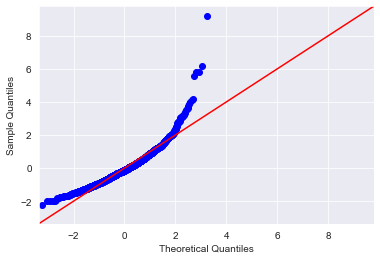

In [53]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Check Homoscedasticity Assumption
Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

2356
2356


ValueError: x and y must be the same size

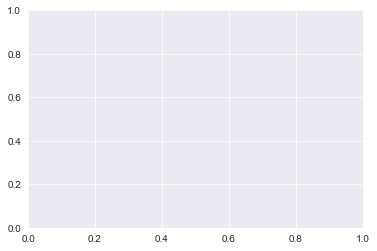

In [54]:
print(len(train[x_cols]))
print(len(train))
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

#### This is for the description data

### Make Additional Refinements
Check for outliers

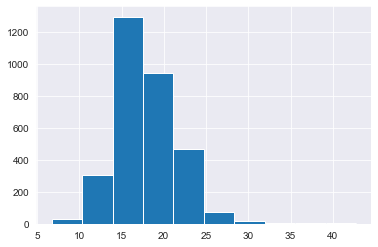

In [56]:
df.percent_Smokers.hist() # using smokers for example

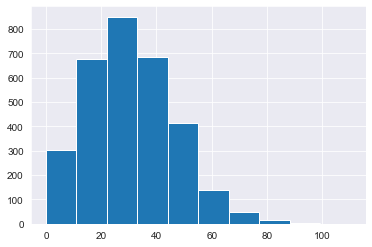

In [57]:
# Teen_Birth_Rate
df.Teen_Birth_Rate.hist()

In [58]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.Teen_Birth_Rate.quantile(q=q)))

0.8 percentile: 44.021632146200005
0.81 percentile: 44.57537042527999
0.82 percentile: 45.13786282708
0.83 percentile: 45.7437253245
0.84 percentile: 46.408010351360005
0.85 percentile: 47.19902860679999
0.86 percentile: 48.28781243336
0.87 percentile: 49.08266710231
0.88 percentile: 49.87582828444
0.89 percentile: 50.517701593030004
0.9 percentile: 51.372594874
0.91 percentile: 52.51232592673
0.92 percentile: 53.86830442256
0.93 percentile: 54.719212391510005
0.94 percentile: 56.57725777354
0.95 percentile: 58.71437884169999
0.96 percentile: 60.65668465383999
0.97 percentile: 63.949185825849995
0.98 percentile: 67.52576746547999
0.99 percentile: 73.87815089257002


### To remove extreme outliers we could use a function like this to remove outliers......

In [59]:
# use code similar to this to strip outliers
# once it's gone it's gone => 

limit = 100

orig_tot = len(df)
df = df[df.Teen_Birth_Rate < limit] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.Teen_Birth_Rate.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.00031826861871419476


C:\Users\User1\Anaconda3\lib\site-packages\pandas\core\base.py:1300: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)
C:\Users\User1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Firearm_Fatalities_Rate   R-squared:                       0.048
Model:                                 OLS   Adj. R-squared:                  0.047
Method:                      Least Squares   F-statistic:                     41.02
Date:                     Mon, 24 Feb 2020   Prob (F-statistic):           4.14e-18
Time:                             15:22:54   Log-Likelihood:                -5393.3
No. Observations:                     1639   AIC:                         1.079e+04
Df Residuals:                         1636   BIC:                         1.081e+04
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   12.6581      0.506     25.001      0.000      11.665      13.651
percent_Alcohol_Impaired     0.0018      0.014      0.125      0.901      -0.026       0.030
Chlamydia_Rate               0.0059      0.001      9.051      0.000       0.005       0.007
==============================================================================
Omnibus:                      343.861   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              940.458
Skew:                           1.091   Prob(JB):                    6.05e-205
Kurtosis:                       6.002   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check the Homoscedasticity Assumption

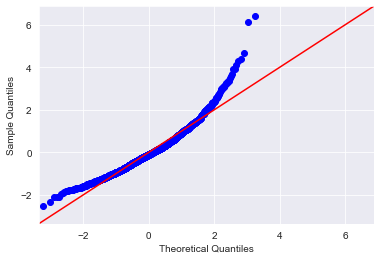

In [60]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

ValueError: x and y must be the same size

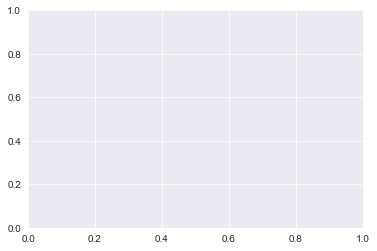

In [61]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

### Interactions

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
regression = LinearRegression()

In [70]:
y = pd.DataFrame(boston.target,columns = ['target'])
df = pd.DataFrame(boston.data, columns = boston.feature_names)
all_data = pd.concat([y,df], axis = 1)

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, df, y, scoring='r2', cv=crossvalidation))

AttributeError: 'DataFrame' object has no attribute 'outcome'

### Get the measures into a single table 

In [ ]:
rf2.head(2)

In [ ]:
rf2 = rf2.dropna()

In [ ]:
rf2 = rf2[rf2.Measure != 'Measure']

In [55]:
rf2

,Measure,Source,Year(s)
0,Life expectancy,National Center for Health Statistics - Mortal...,2015-2017
1,Premature age-adjusted mortality,CDC WONDER mortality data,2015-2017
2,Child mortality,CDC WONDER mortality data,2014-2017
3,Infant mortality,CDC WONDER mortality data,2011-2017
4,Frequent physical distress,Behavioral Risk Factor Surveillance System,2016
5,Frequent mental distress,Behavioral Risk Factor Surveillance System,2016
6,Diabetes prevalence,CDC Diabetes Interactive Atlas,2015
7,HIV prevalence,"National Center for HIV/AIDS, Viral Hepatitis,...",2015
8,NaN,NaN,NaN
9,Additional Measures: Health Behaviors,NaN,NaN


In [ ]:
indep = ['Premature death', 
         'Poor or fair health',
         'Poor physical health days', 
         'Poor mental health days', 
         'Low birthweight,Adult smoking',
         '**Adult obesity**', 
         'Food environment index', 
         'Physical inactivity', 
         'Access to exercise opportunities', 
         'Excessive drinking', 
         'Alcohol-impaired driving deaths', 
         'Sexually transmitted infections', 
         'Teen births',
         '**Uninsured**', 
         'Primary care physicians', 
         'Dentists', 
         'Mental health providers',
         'Preventable hospital stays', 
         'Mammography screening', 
         'Flu vaccinations', 
         '**High school graduation**', 
         '**Some college**', 
         '**Unemployment**', 
         'Children in poverty', 
         '**Income inequality**',
         'Children in single-parent households', 
         'Social associations', 
         'Violent crime', 
         'Injury deaths', 
         'Air pollution - particulate matter', 
         'Drinking water violations', 
         'Severe housing problems', 
         'Driving alone to work', 
         'Long commute - driving alone', 
         'Life expectancy', 
         'Premature age-adjusted mortality', 
         'Child mortality', 
         'Infant mortality', 
         'Frequent physical distress', 
         'Frequent mental distress', 
         'Diabetes prevalence', 
         'HIV prevalence', 
         'Food insecurity', 
         'Limited access to healthy foods', 
         'Drug overdose deaths', 
         'Motor vehicle crash deaths', 
         'Insufficient sleep', 
         'Uninsured adults', 
         'Uninsured children', 
         'Other primary care providers', 
         'Disconnected youth', 
         '**Median household income**', 
         'Children eligible for free or reduced price lunch', 
         '**Residential segregation - black/white**', 
         '**Residential segregation - non-white/white**', 
         'Homicides', 
         'Firearm fatalities',
         '**Homeownership**', 
         'Severe housing cost burden', 
         '**Demographics**']

In [ ]:
x_cols